**Neural Network Playground**

Visualising a neural network and its working is always fun. Here is a website, where you can play and learn a few things: https://playground.tensorflow.org/ (accessed date: 07 Nov, 2020)

</hr>

**Today's Lab -- Manually coding a neural network from scratch**

In today's lab, we will look at simple working principle (mathematics) of a neural network. Most of the things should be clear from the code itself; if needed, I will walk you through these codes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#set a seed
np.random.seed(0)

Logical 2-bit **AND** data with $(x_1, x_2)$ as attributes; and $y$ as the output.


| $x_1$ | $x_2$ | $y$ |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

This is the architecture that we are planning to use for this problem:
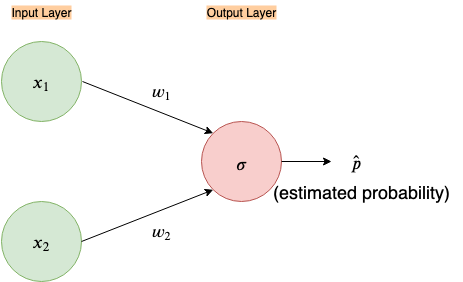

Equations for reference (Make sure you derive these on your own)

Net input: $z = W.X + b$

Activation at output (or the predicted output): $a = \sigma(z)$ ($\sigma$ is sigmoid($\cdot$) activation function)

Loss: $L = \frac{1}{2m}\left(y-a\right)^2$ : this is MSE Loss 

(**Note** We are not supposed to be using MSE loss for classification problem. MSE loss is useful for regression problems. The AND classification problem that we are solving here is a classification problem as $y$ is discrete. For this kind of problem, cross-entropy loss is suitable. For simplicity, I am using it for this program.)

Partial derivatives (Compute sequence backward is: $L \rightarrow a \rightarrow z \rightarrow {W, b}$)

$\frac{dL}{da} = -\frac{1}{m}(y-a)$

$\frac{da}{dz}$ = $a(1-a)$

$\frac{dz}{dW} = x$

$\frac{dz}{db} = 0$

In [3]:
#I am using here whole dataset to build the model.
X_train = X
y_train = y

print(X_train) 
print('Shape of X_train:',X_train.shape)

print(y_train)
print('Shape of y_train:',y_train.shape)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Shape of X_train: (4, 2)
[0 0 0 1]
Shape of y_train: (4,)


In [4]:
# Some utility functions
def compute_mse_cost(Y, Y_hat):
    m = Y.shape[0] 

    cost = (1 / (2 * m)) * np.sum(np.square(Y - Y_hat))
    cost = np.squeeze(cost)

    dY_hat = -1 / m * (Y - Y_hat) 

    return cost, dY_hat

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [5]:
W = np.random.randn(1, X_train.shape[1])
b = np.zeros((1, 1))

In [6]:
print(W)
print(W.shape)

print(b)
print(b.shape)

[[1.76405235 0.40015721]]
(1, 2)
[[0.]]
(1, 1)


In [9]:
epochs = 500
learning_rate = 1
losses = []

for ep in range(epochs):
  
    # ------------
    # Forward pass
    # ------------

    z = np.dot(W, X_train.T) + b
    a = sigmoid(z)
    # print(z)
    # print(a)

    # --------------------------
    # Compute Loss and gradients
    # --------------------------

    loss, da = compute_mse_cost(y_train, a)
    # print(loss)
    # print(da)
    dz = da * a * (1-a) # Differentiate the sigmoid function and you will understand this step 
    # print(dz)
    dW = np.dot(dz, X_train)
    db = np.sum(dz, axis=1, keepdims=True)

    # ----------------
    # Gradient Descent
    # ----------------

    W = W - learning_rate * dW
    b = b - learning_rate * db
    # print(W)
    # print(b)

    losses.append(loss)
    
    if ep % 20 == 0:
        print(f"Epoch: {ep} | Loss: {loss}")

Epoch: 0 | Loss: 0.03745790056944601
Epoch: 20 | Loss: 0.03415787193065959
Epoch: 40 | Loss: 0.03138802247441654
Epoch: 60 | Loss: 0.0290168207127931
Epoch: 80 | Loss: 0.02695728670243796
Epoch: 100 | Loss: 0.025148700491370343
Epoch: 120 | Loss: 0.0235466878456663
Epoch: 140 | Loss: 0.022117602096189466
Epoch: 160 | Loss: 0.02083518060510489
Epoch: 180 | Loss: 0.019678454718993432
Epoch: 200 | Loss: 0.018630381472952692
Epoch: 220 | Loss: 0.01767690987595275
Epoch: 240 | Loss: 0.01680632042954812
Epoch: 260 | Loss: 0.01600874347516022
Epoch: 280 | Loss: 0.015275798888503153
Epoch: 300 | Loss: 0.014600320771153108
Epoch: 320 | Loss: 0.013976143333471358
Epoch: 340 | Loss: 0.013397931877006592
Epoch: 360 | Loss: 0.012861047688354655
Epoch: 380 | Loss: 0.012361438871117921
Epoch: 400 | Loss: 0.01189555130964615
Epoch: 420 | Loss: 0.01146025545621748
Epoch: 440 | Loss: 0.011052785692241936
Epoch: 460 | Loss: 0.010670689777626242
Epoch: 480 | Loss: 0.010311786462757697


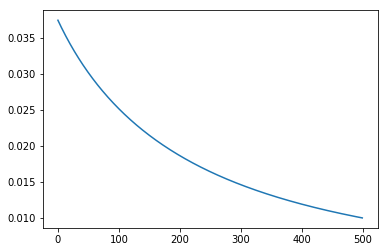

In [10]:
plt.plot(losses)

In [11]:
z_pred = np.dot(W, X_train.T) + b
a_pred = sigmoid(z_pred).squeeze()
y_pred = np.array([1 if i>0.5 else 0 for i in a_pred])

In [12]:
print(y_pred)
print(y_train)

[0 0 0 1]
[0 0 0 1]


**Home Exercise**

**Q1** Write a code for 3-bit AND and OR dataset. Use 80% dataset as train-set and rest 20% as test-set.

**Q2** Train a neural network for 2-bit XOR data. For those who don't know XOR this is the data 

| $x_1$ | $x_2$ | $y$ |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

It is not straight forward task as the AND one.